## Task 1: Import packages and Load data

In [213]:
import pandas as pd
import os
import matplotlib.pyplot as plt
path="/Users/OWNER/Documents/Sales-Reporting-main/Sales-Reporting-main/data/"
os.listdir(path)

['.DS_Store',
 'sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

## Task 2: Clean and Preprocess data

### Task 2.1: Merge 12-month data

In [246]:
frames=[]
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath=path+file
        df1=pd.read_csv(filepath)
        frames.append(df1)
        result=pd.concat(frames)
        
result.to_csv('annualSales2019.csv',index=False)
df=result
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Task 2.2: Add 'Month' column

In [247]:
df['Month']=df['Order Date'].str[0:2]
print(set(df['Month']))

{'07', '04', '10', '01', '02', '08', '09', nan, '11', '05', '12', '03', '06', 'Or'}


### Task 2.3: Get rid of 'NaN' and 'Or' value

In [248]:
df=df.dropna(how="all")
df=df[df["Month"] != 'Or']
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


## Task 3: Reporting

### Task 3.1: What was the best month for sales? How much was earned that month?

C:\Users\OWNER\AppData\Local\Temp\ipykernel_15724\3415310685.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_values=df.groupby('Month').sum()['Sales']


Text(0, 0.5, 'Sales in USD')

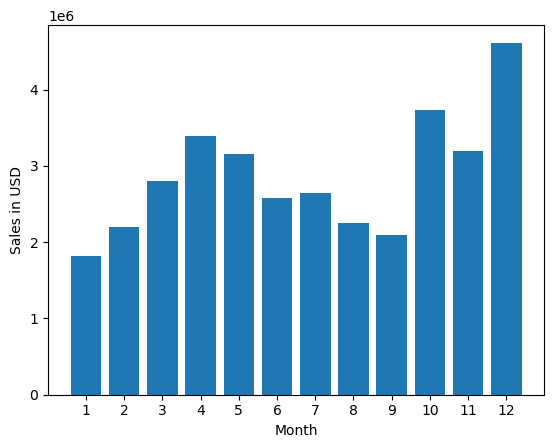

In [260]:
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'],downcast="integer")
df['Price Each']=pd.to_numeric(df['Price Each'],downcast="float")
df['Sales']=df['Quantity Ordered']*df['Price Each']
moving_column=df.pop('Sales')
df.insert(4,'Sales',moving_column)
sale_values=df.groupby('Month').sum()['Sales']
sale_values.max()
months=range(1,13)
plt.bar(x=months,height=sale_values)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')

### Task 3.2: What city has the best sales?

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32 [' Boston' ' Portland' ' San Francisco' ' Los Angeles' ' Austin'
 ' Atlanta' ' Seattle' ' New York City' ' Dallas']


C:\Users\OWNER\AppData\Local\Temp\ipykernel_15724\645367123.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_values_city=df.groupby('City').sum()['Sales']


Text(0, 0.5, 'Sales in USD')

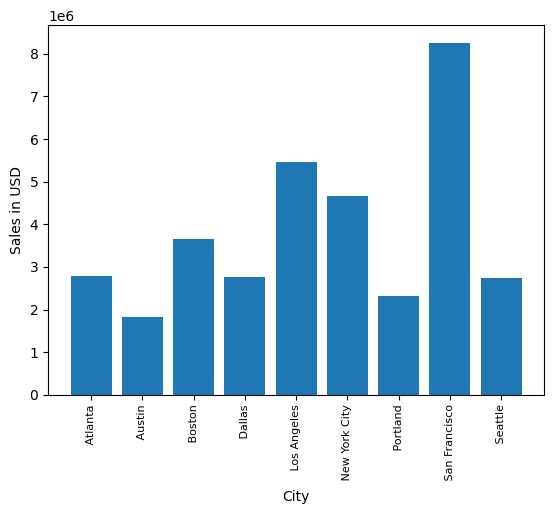

In [393]:
address_to_city= lambda address:address.split(',')[1]
df['City']=df['Purchase Address'].apply(address_to_city)
sale_values_city=df.groupby('City').sum()['Sales']
sale_values_city.max()
print(sale_values_city,cities)
cities=df['City'].unique()
plt.bar(x=sorted(cities),height=sale_values_city)
plt.xticks(cities,rotation=90,size=8)
plt.xlabel('City')
plt.ylabel('Sales in USD')

In [293]:
sale_values_city

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

### Task 3.3: What time should we display ads to maximize the likelihood of customer’s buying product?

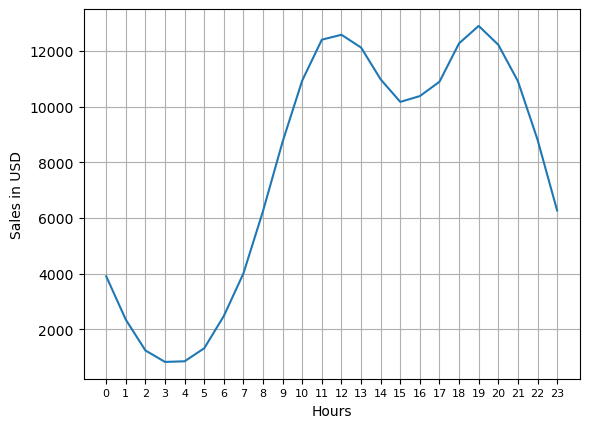

In [333]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Hours']=df['Order Date'].dt.hour
sale_value_hours=df.groupby('Hours').count()['Sales']
hours=[hour for hour,sale in sale_value_hours.items()]
plt.plot(hours,sale_value_hours)
plt.xticks(hours,size=8)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

In [308]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston,21:
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland,14:
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13:
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20:
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin,11:


### Task 3.4: What products are most often sold together?

In [388]:
from itertools import combinations
from collections import Counter
df_dup=df[df['Order ID'].duplicated(keep=False)]
groupProduct=lambda product:','.join(product)
df_dup['All Products']=df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup=df_dup[['All Products','Order ID']].drop_duplicates()

count=Counter()
for products in df_dup['All Products']:
    product_list=products.split(',')
    count.update(Counter(combinations(product_list, 2)))
print(count)


Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_15724\2947723146.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products']=df_dup.groupby('Order ID')['Product'].transform(groupProduct)


C:\Users\OWNER\AppData\Local\Temp\ipykernel_15724\2603001047.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_products = df.groupby('Product').sum()['Quantity Ordered']
C:\Users\OWNER\AppData\Local\Temp\ipykernel_15724\2603001047.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']
C:\Users\OWNER\AppData\Local\Temp\ipykernel_15724\2603001047.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


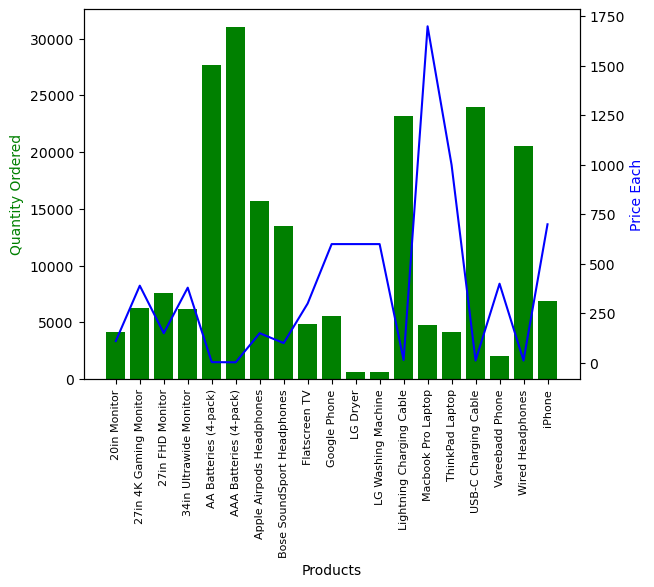

In [404]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()

### Task 3.5: What product sold the most? Why do you think it sold the most?